In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv


# EDA

In [104]:
df = pd.read_csv('/kaggle/input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv')

In [105]:
df.head(10)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.0,20.0,"Utensil Scrub-Pad, Glove",4.3,Scotch Brite Anti- Bacterial Scrub Pad thoroug...


In [106]:
df.tail(10)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
27545,27546,Toilet Cleaning Brush - Round With Holder (Big),Cleaning & Household,"Mops, Brushes & Scrubs",Liao,189.00,349.0,Toilet & Other Brushes,3.8,This round toilet brush is made up of virgin q...
27546,27547,Organic Powder - Garam Masala,"Foodgrains, Oil & Masala",Organic Staples,Organic Tattva,152.00,160.0,Organic Masalas & Spices,4.2,Organic Tattva Garam masala is a famous spice ...
27547,27548,Powder - Baking,Snacks & Branded Foods,Ready To Cook & Eat,Kwality,38.00,38.0,Home Baking,3.7,Kwality Baking Powder Directions for use: Use ...
27548,27549,Apple Cider Vinegar Shampoo,Beauty & Hygiene,Hair Care,Morpheme Remedies,499.00,499.0,Shampoo & Conditioner,5.0,"Say no to dull, lifeless, dry and damaged hair..."
27549,27550,Papad - Garlic Disco,Snacks & Branded Foods,Ready To Cook & Eat,Atish,61.00,61.0,"Papads, Ready To Fry",4.0,Papads are prepared from urad dal flour and sp...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."
27554,27555,United Dreams Go Far Deodorant,Beauty & Hygiene,Men's Grooming,United Colors Of Benetton,214.53,390.0,Men's Deodorants,4.5,The new mens fragrance from the United Dreams ...


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [108]:
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


In [109]:
df.shape

(27555, 10)

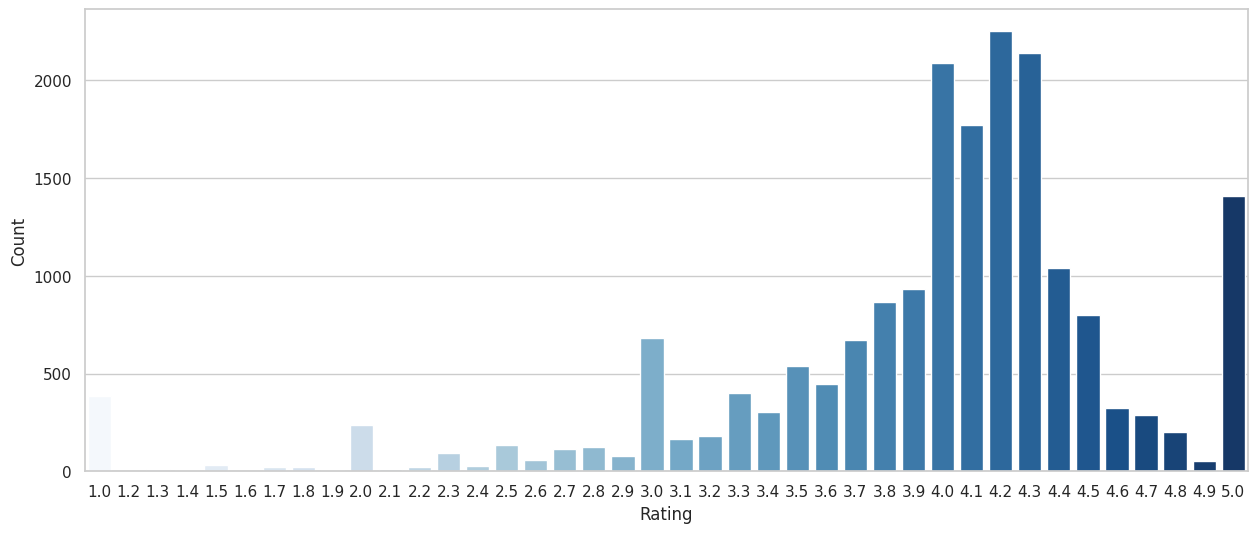

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

rating_counts = df['rating'].value_counts()

plt.figure(figsize=(15, 6))
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Blues')
ax.set(xlabel='Rating', ylabel='Count')
plt.show()

# Data Preprocessing

In [111]:
df.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [112]:
# Null Value Percentage Per column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
index,index,0.000000
product,product,0.003629
category,category,0.000000
sub_category,sub_category,0.000000
brand,brand,0.003629
sale_price,sale_price,0.000000
market_price,market_price,0.000000
type,type,0.000000
rating,rating,31.304663
description,description,0.417347


we will handle null values later after visualizations

In [113]:
#unique catagories
for elem in df['category'].unique():
    print(elem)

Beauty & Hygiene
Kitchen, Garden & Pets
Cleaning & Household
Gourmet & World Food
Foodgrains, Oil & Masala
Snacks & Branded Foods
Beverages
Bakery, Cakes & Dairy
Baby Care
Fruits & Vegetables
Eggs, Meat & Fish


In [114]:
#unique sub_categories
for elem in df['sub_category'].unique():
    print(elem)

Hair Care
Storage & Accessories
Pooja Needs
Bins & Bathroom Ware
Bath & Hand Wash
All Purpose Cleaners
Skin Care
Mops, Brushes & Scrubs
Cooking & Baking Needs
Chocolates & Biscuits
Fresheners & Repellents
Snacks, Dry Fruits, Nuts
Dairy & Cheese
Pasta, Soup & Noodles
Dry Fruits
Drinks & Beverages
Kitchen Accessories
Flask & Casserole
Breakfast Cereals
Frozen Veggies & Snacks
Fruit Juices & Drinks
Cookies, Rusk & Khari
Fragrances & Deos
Tea
Masalas & Spices
Men's Grooming
Chocolates & Candies
Steel Utensils
Tinned & Processed Food
Organic Staples
Sauces, Spreads & Dips
Pickles & Chutney
Ready To Cook & Eat
Baby Bath & Hygiene
Stationery
Pet Food & Accessories
Biscuits & Cookies
Oral Care
Snacks & Namkeen
Detergents & Dishwash
Crockery & Cutlery
Cuts & Sprouts
Health & Medicine
Cookware & Non Stick
Dairy
Feminine Hygiene
Diapers & Wipes
Edible Oils & Ghee
Baby Food & Formula
Fresh Fruits
Fresh Vegetables
Herbs & Seasonings
Breads & Buns
Oils & Vinegar
Feeding & Nursing
Energy & Soft Drink

In [115]:
#unique item types
for elem in df['type'].unique():
    print(elem)

Hair Oil & Serum
Water & Fridge Bottles
Lamp & Lamp Oil
Laundry, Storage Baskets
Bathing Bars & Soaps
Disinfectant Spray & Cleaners
Face Care
Hand Wash & Sanitizers
Shampoo & Conditioner
Utensil Scrub-Pad, Glove
Flours & Pre-Mixes
Luxury Chocolates, Gifts
Floor & Other Cleaners
Mosquito Repellent
Soap Cases & Dispensers
Aromatherapy
Roasted Seeds & Nuts
Tofu
Tools & Accessories
Imported Noodles
Other Dry Fruits
Gourmet Tea & Tea Bags
Choppers & Graters
Casserole
Granola & Cereal Bars
Frozen Veg Snacks
Lip Care
Juices
Bakery Biscuits, Cookies
Men's Deodorants
Green Tea
Containers Sets
Whole Spices
Blended Masalas
Chocolates
Eau De Toilette
Cookies, Biscotti, Wafer
Steel Lunch Boxes
Olive, Jalapeno, Gherkin
Organic Rice, Other Rice
Shaving Care
Imported Cleaners
Thai & Asian Sauces
Chutney Powder
Cooking Pastes
Gourmet Juices & Drinks
Face & Body
Beans & Pulses
Papads, Ready To Fry
Hair & Scalp Treatment
Baby Health
Notebooks, Files, Folders
Kitchen Tools & Other Accessories
Pet Meals & 

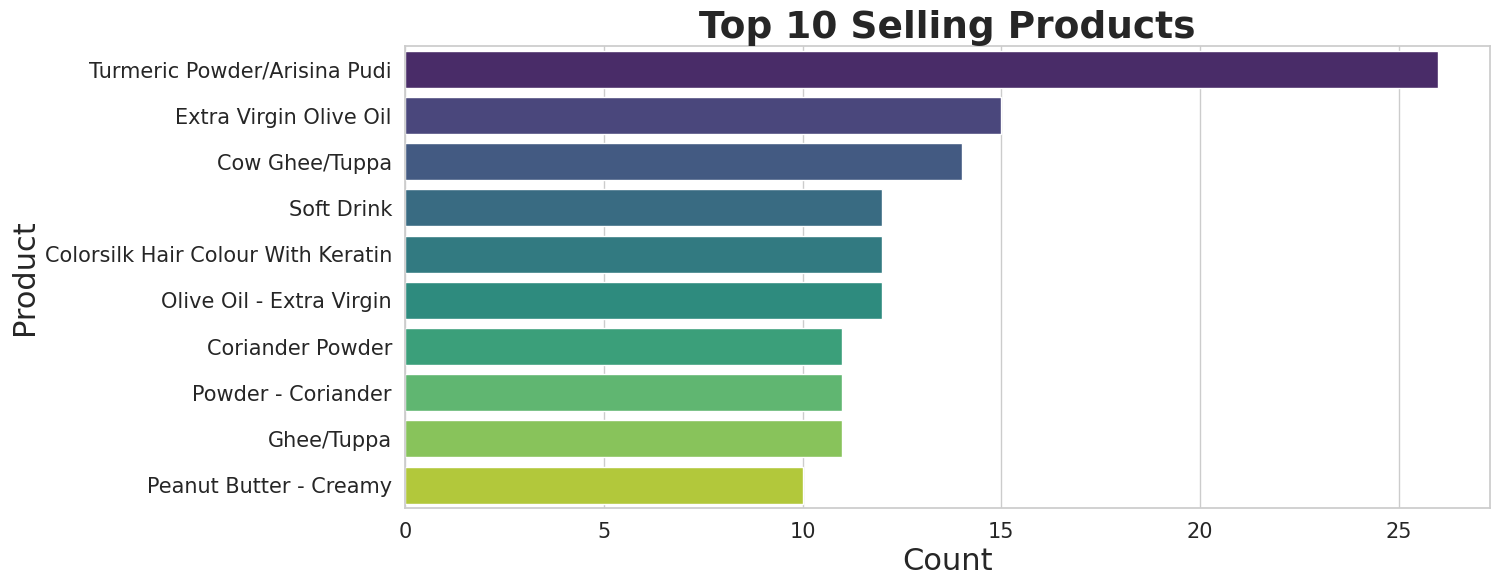

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

data = df['product'].value_counts()[:10]
plt.figure(figsize=(14, 6))
sns.barplot(x=data.values, y=data.index, palette="viridis")
plt.xlabel('Count', fontdict={'fontsize': 22})
plt.ylabel('Product', fontdict={'fontsize': 22})
plt.title('Top 10 Selling Products', fontweight="bold", fontdict={'fontsize': 27})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

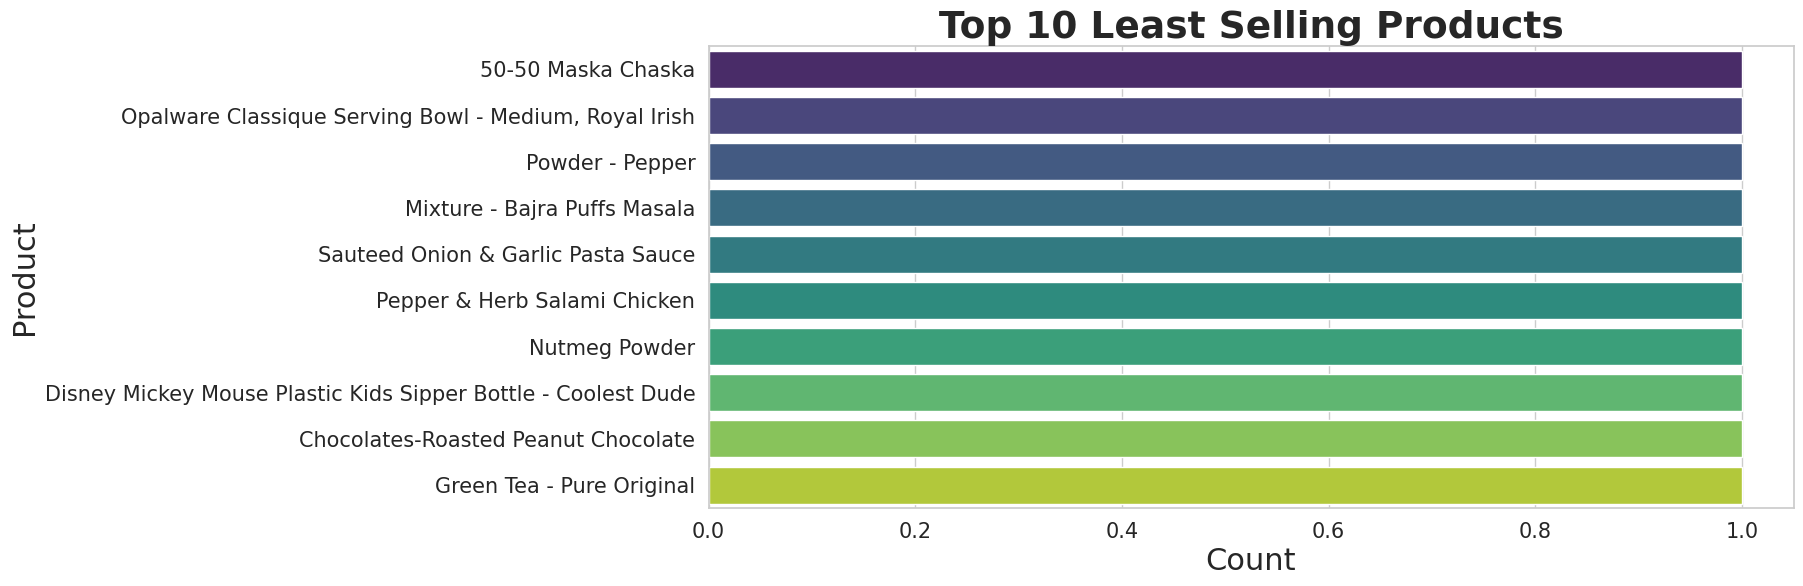

In [117]:
data = df['product'].value_counts().tail(10)  # Select the 10 least selling products
plt.figure(figsize=(14, 6))
sns.barplot(x=data.values, y=data.index, palette="viridis")
plt.xlabel('Count', fontdict={'fontsize': 22})
plt.ylabel('Product', fontdict={'fontsize': 22})
plt.title('Top 10 Least Selling Products', fontweight="bold", fontdict={'fontsize': 27})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

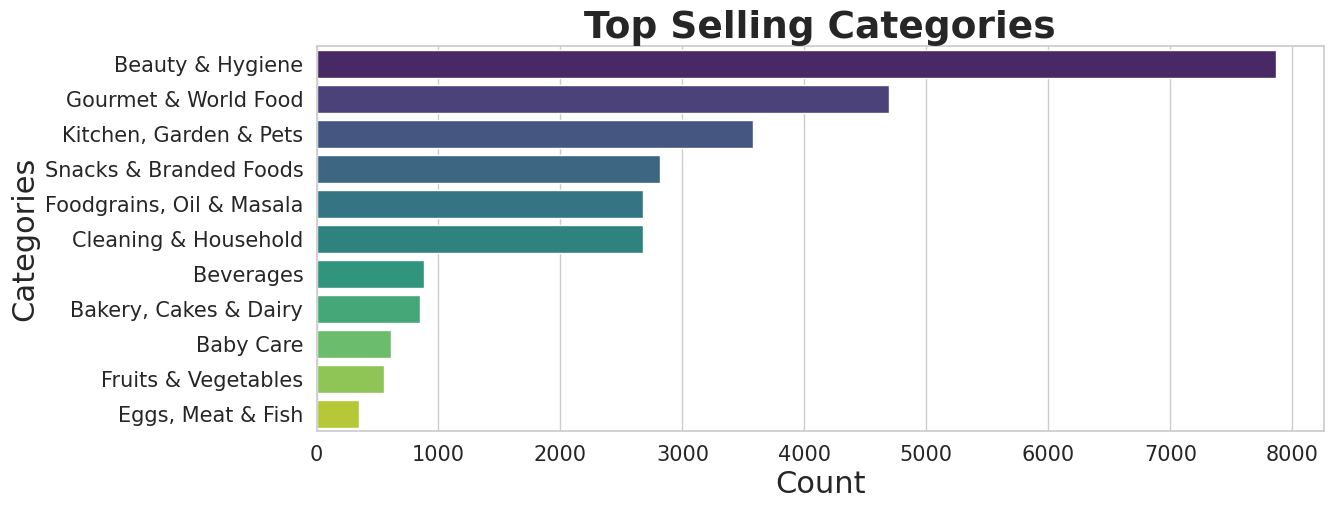

In [118]:
data = df['category'].value_counts()
plt.figure(figsize=(13, 5))
sns.barplot(x=data.values, y=data.index, palette="viridis")
plt.xlabel('Count', fontdict={'fontsize': 22})
plt.ylabel('Categories', fontdict={'fontsize': 22})
plt.title('Top Selling Categories', fontweight="bold", fontdict={'fontsize': 27})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

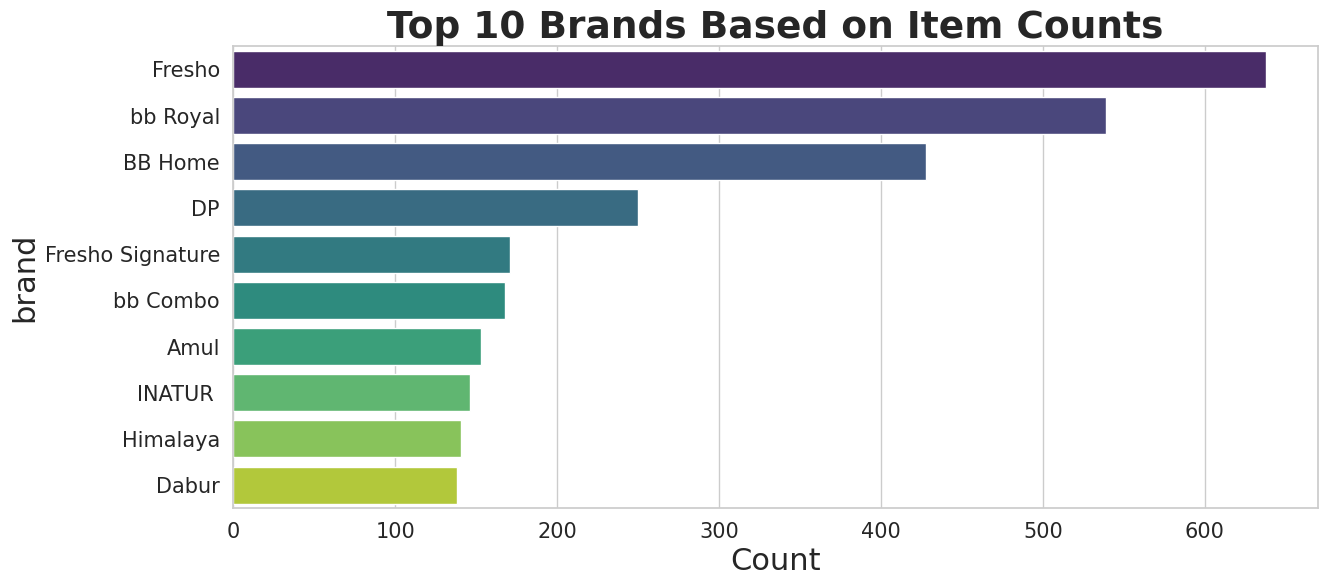

In [119]:
top_10_brands = df['brand'].value_counts().head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=top_10_brands.values, y=top_10_brands.index, palette="viridis")
plt.xlabel('Count', fontdict={'fontsize': 22})
plt.ylabel('brand', fontdict={'fontsize': 22})
plt.title('Top 10 Brands Based on Item Counts', fontweight="bold", fontdict={'fontsize': 27})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

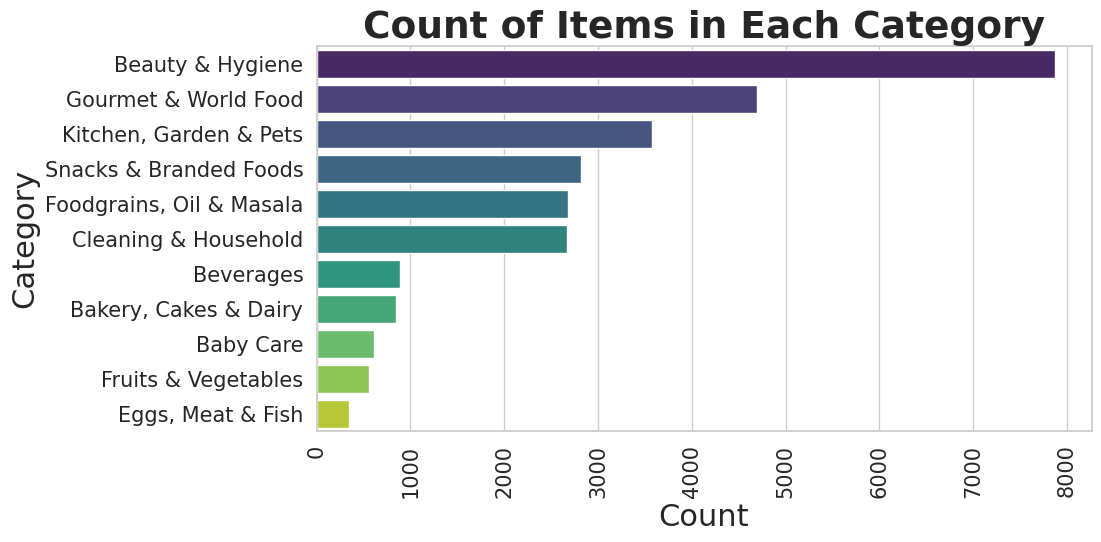

In [120]:
counts = df['category'].value_counts()
counts_df = pd.DataFrame({'Category': counts.index, 'Counts': counts.values})

plt.figure(figsize=(10, 5))
sns.barplot(x='Counts', y='Category', data=counts_df, palette='viridis')
plt.xlabel('Count', fontdict={'fontsize': 22})
plt.ylabel('Category', fontdict={'fontsize': 22})
plt.title('Count of Items in Each Category', fontweight="bold", fontdict={'fontsize': 27})
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

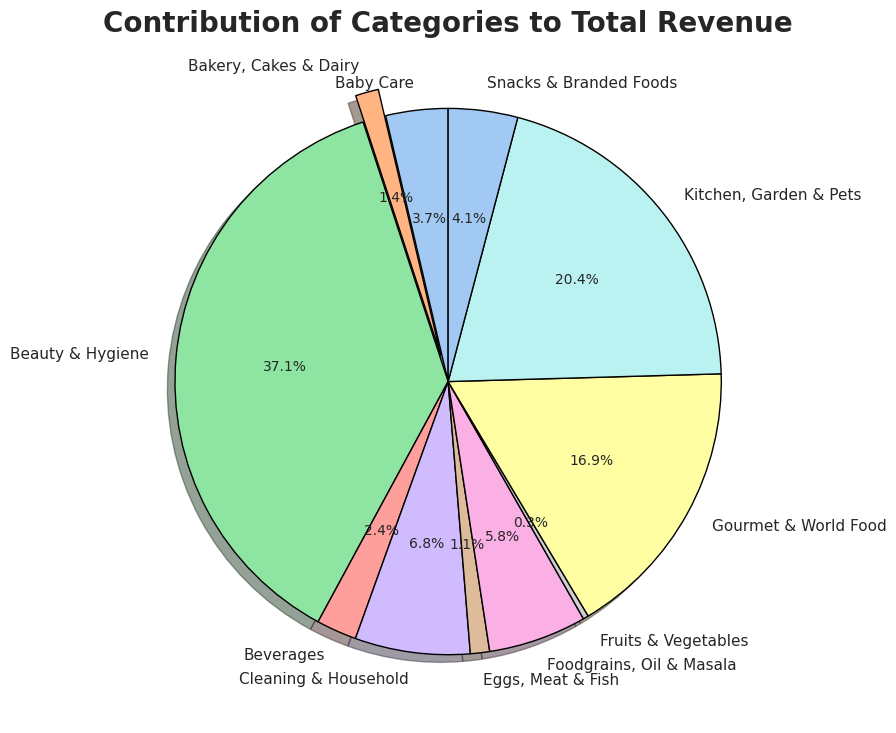

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

data = df['sale_price'].groupby(df['category']).sum()

# Custom color palette
colors = sns.color_palette('pastel')[0:len(data)]

# Find the index of 'Bakery, Cakes & Dairy'
bakery_index = data.index.get_loc('Bakery, Cakes & Dairy')

# Explode the slice corresponding to 'Bakery, Cakes & Dairy'
explode = [0.1 if i == bakery_index else 0 for i in range(len(data))]

plt.figure(figsize=(9, 9))
plt.pie(x=data, labels=data.index, startangle=90, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'},
        colors=colors, explode=explode, shadow=True)
plt.title('Contribution of Categories to Total Revenue', fontweight="bold", fontdict={'fontsize': 20})
plt.rcParams['font.size'] =10
plt.tight_layout()
plt.show()


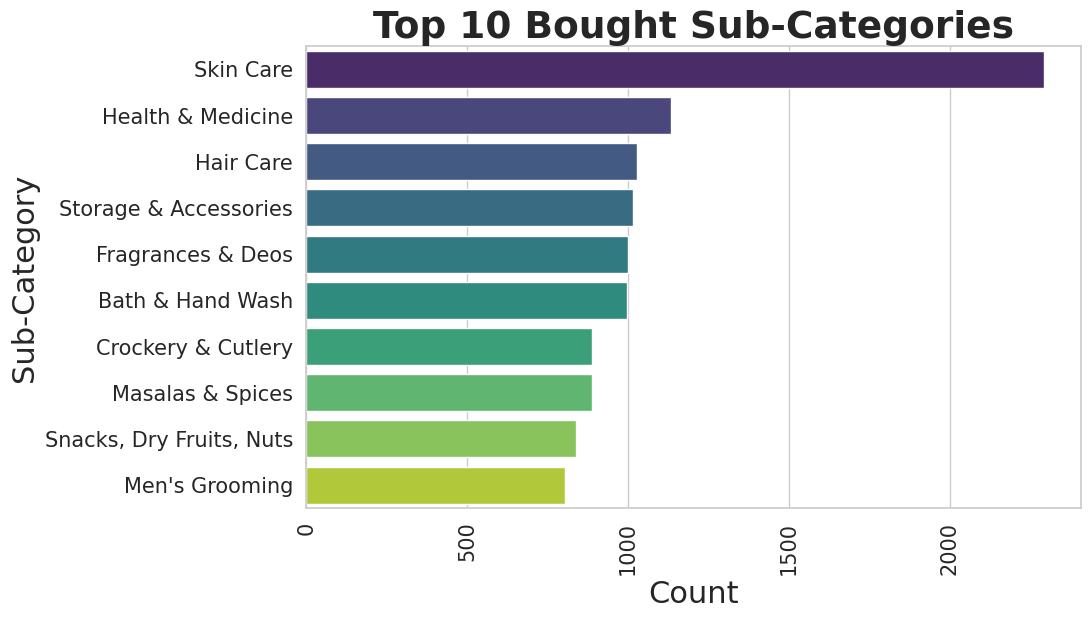

In [122]:
counts = df['sub_category'].value_counts()
counts_df_1 = pd.DataFrame({'Category': counts.index, 'Counts': counts.values})[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=counts_df_1['Counts'], y=counts_df_1['Category'], palette='viridis')
plt.xlabel('Count', fontdict={'fontsize': 22})
plt.ylabel('Sub-Category', fontdict={'fontsize': 22})
plt.title('Top 10 Bought Sub-Categories', fontweight="bold", fontdict={'fontsize': 27})
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()


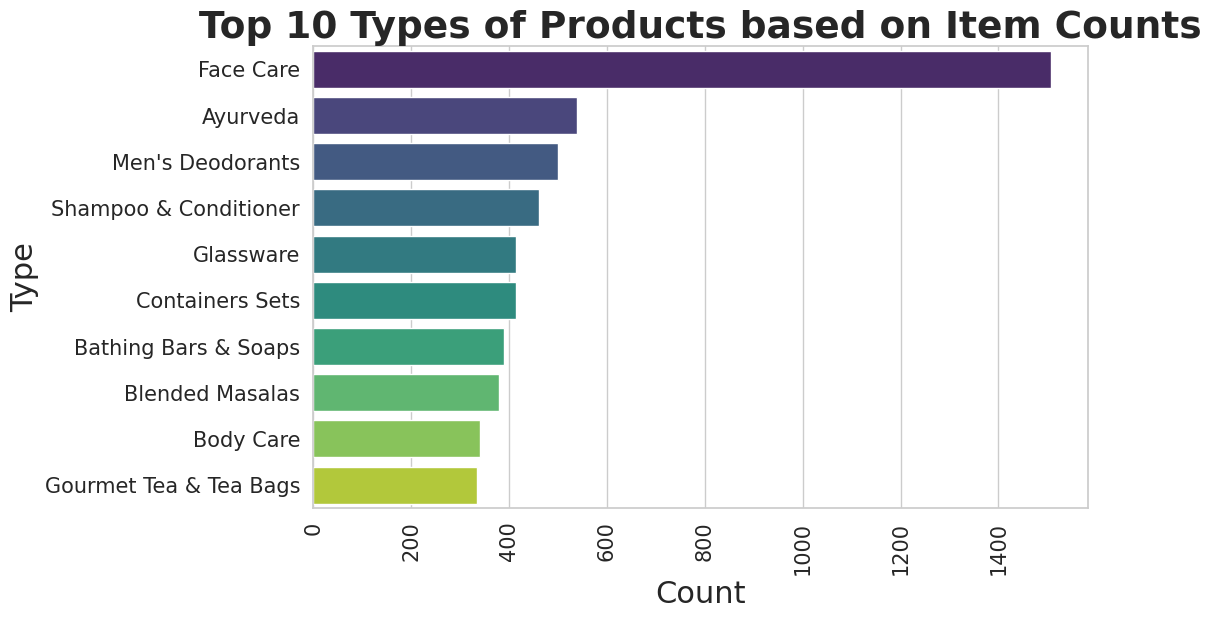

In [123]:
counts = df['type'].value_counts()
counts_df_type = pd.DataFrame({'Type': counts.index, 'Counts': counts.values})[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=counts_df_type['Counts'], y=counts_df_type['Type'], palette='viridis')
plt.xlabel('Count', fontdict={'fontsize': 22})
plt.ylabel('Type', fontdict={'fontsize': 22})
plt.title('Top 10 Types of Products based on Item Counts', fontweight="bold", fontdict={'fontsize': 27})
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

---------------

In [124]:
df = df.dropna()
df.isnull().sum()

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

In [125]:
df.shape

(18840, 10)

# Content Based Recommendor

In [127]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [133]:
rmv_spc = lambda a:a.strip()
get_list = lambda a:list(map(rmv_spc,re.split('& |, |\*|\n', a)))

In [135]:
def cleaner(x):
    if isinstance(x, list):
        return [str(i).lower().replace(" ", "") for i in x]
    elif isinstance(x, str):
        return str(x).lower().replace(" ", "")
    else:
        return ''

In [136]:
def couple(x):
    return ' '.join(x['category']) + ' ' + ' '.join(x['sub_category']) + ' '+x['brand']+' ' +' '.join( x['type'])

In [137]:
df['category'] = df['category'].apply(get_list)
df['sub_category'] = df['sub_category'].apply(get_list)
df['type'] = df['type'].apply(get_list)

df['category'] = df['category'].apply(cleaner)
df['sub_category'] = df['sub_category'].apply(cleaner)
df['type'] = df['type'].apply(cleaner)
df['brand'] = df['brand'].apply(cleaner)

df['keywords'] = df.apply(couple, axis=1)

In [138]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['keywords'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [139]:
df = df.reset_index()
indices = pd.Series(df.index, index=df['product'])

In [141]:
def recommendor(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['product'].iloc[movie_indices]

In [144]:
rec = recommendors('Brass Angle Deep - Plain, No.2', cosine_sim).values
print(rec)

['Brass Kachua Stand Deepam - No.1' 'Brass Angle Deep Stand - Plain, No.2'
 'Brass Lakshmi Deepam - Plain, No.2' 'Brass Kuber Deepam - No.1'
 'Brass Deepa Matki - Round, No.3' 'Brass Kuber Deepam - No.2'
 'Brass Deepa Matki - Round, No.1' 'Brass Angle Deep Stand - Plain, No.3'
 'Brass Angle Deep Stand - Plain, No.1' 'Brass Kachua Stand Deepam - No.2']


In [146]:
rec = recommendors('Water Bottle - Orange', cosine_sim).values
print(rec)

['Glass Water Bottle - Aquaria Organic Purple'
 'Glass Water Bottle With Round Base - Transparent, B1364'
 'H2O Unbreakable Water Bottle - Pink' 'Water Bottle H2O Purple'
 'H2O Unbreakable Water Bottle - Green'
 'Regel Tritan Plastic Sports Water Bottle - Black'
 'Apsara 1 Water Bottle - Assorted Colour'
 'Glass Water Bottle With Round Base - Yellow, B1363'
 'Trendy Stainless Steel Bottle With Steel Cap - Steel Matt Finish, PXP 1002 CV'
 'Penta Plastic Pet Water Bottle - Violet, Wide Mouth']


In [149]:
rec = recommendors('Powder - Pepper', cosine_sim).values
print(rec)

['Powder - Coriander' 'Turmeric Powder/Arisina Pudi' 'Hing'
 'Powder - Chilly' 'White Pepper Powder' 'Powder - Cumin'
 'Masala - Paneer Butter' 'Turmeric Powder/Arisina Pudi'
 'Masala - Brahim Sambar' 'Asafoetida Powder']


In [153]:
rec = recommendors('Peri-Peri Sweet Potato Chips', cosine_sim).values
print(rec)

['High Protein Soya Chips' 'Chia Seeds Chips'
 'Peri-Peri Sweet Potato Chips' 'Sour Cream & Onion'
 'Nacho Chips - Cheese With Herbs, No Onion, No Garlic'
 'Nacho Crisps - Cheese & Herbs' 'Shells - Taco'
 '6 Corn Wraps Try It With Prawns & Avocado'
 'On The Go - Peri Peri Nachos & Salsa Dip'
 'Chips - Keralas Nendran Banana']
